# Question 7

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [50]:


x1 = [1, 2, 3, 4, 5, 6, 7, 8]
x2 = [5, 6, 8, 10, 12, 15, 18, 20]
y  = [10, 12, 15, 18, 21, 25, 28, 30]

df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
X = df[['x1', 'x2']]
y = df['y']

In [51]:
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X, y)

DecisionTreeRegressor(random_state=0)

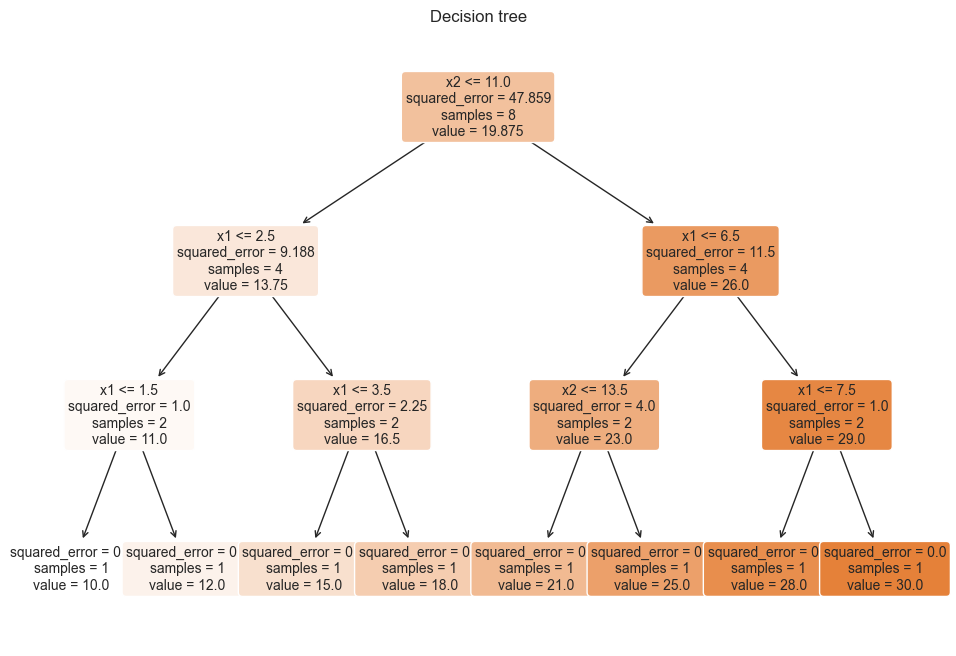

In [52]:

plt.figure(figsize=(12, 8))
plot_tree(dt,
          feature_names=['x1', 'x2'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision tree")
plt.show()


# Question 8

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [54]:
train_data = pd.read_csv("A4_train.csv")
test_data = pd.read_csv("A4_test.csv")

X_train = train_data[['Feature1', 'Feature2']]
y_train = train_data['Label']
X_test  = test_data[['Feature1', 'Feature2']]
y_test  = test_data['Label']

### (a) Train Fully Grown Tree

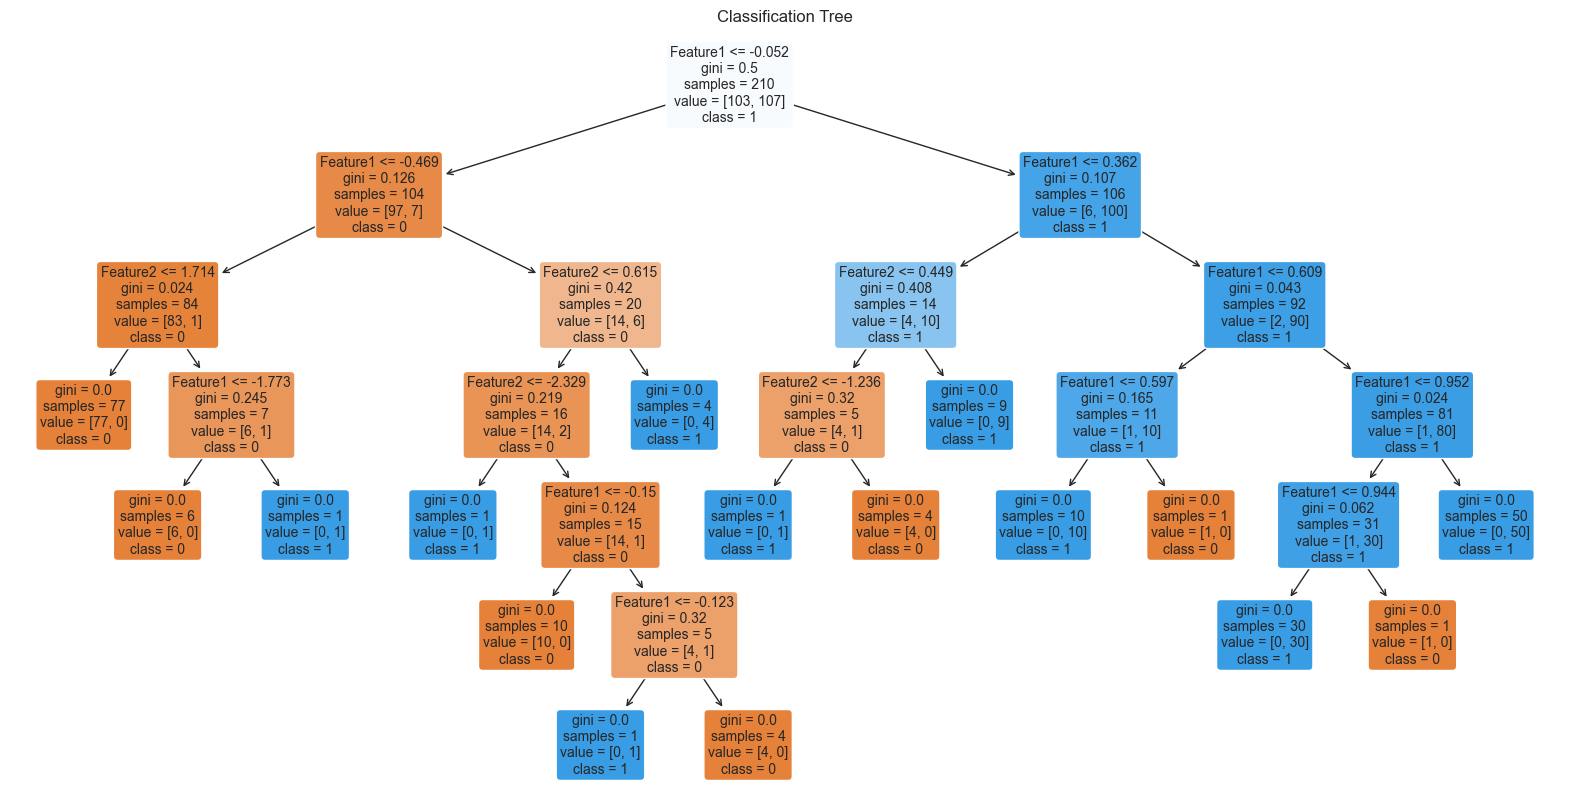

In [55]:

tree = DecisionTreeClassifier(criterion="gini", random_state=0)
tree.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(tree, 
          feature_names=X_train.columns, 
          class_names=["0", "1"],
          filled=True, rounded=True, fontsize=10)
plt.title("Classification Tree")
plt.show()


### (b) Compute SSE on Test Data vs. Tree Depth

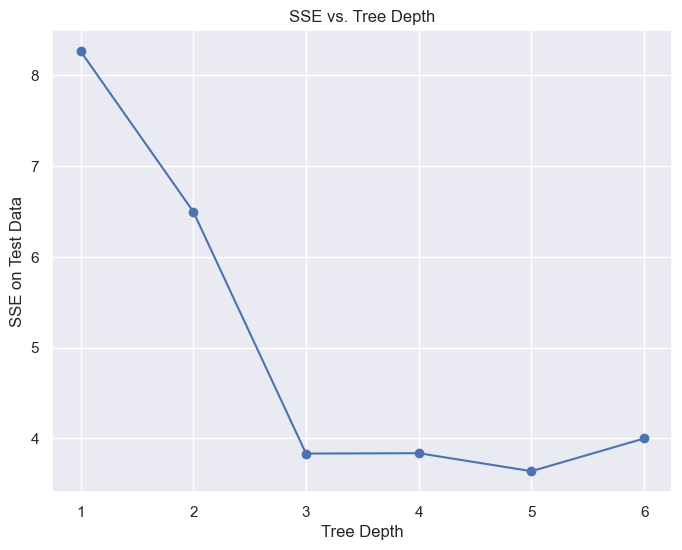

In [ ]:

depth_f = tree.tree_.max_depth
sse_list = []
depths = list(range(1, depth_f + 1))

for i in depths:
    
    clf  = DecisionTreeClassifier(criterion="gini", max_depth=i, random_state=0)
    clf.fit(X_train, y_train)

    probab = clf.predict_proba(X_test)[:, 1]

    sse = np.sum((y_test - probab) ** 2)
    sse_list.append(sse)



plt.figure(figsize=(8, 6))
plt.plot(depths, sse_list, marker="o")
plt.xlabel("Tree Depth")
plt.ylabel("SSE on Test Data")
plt.title("SSE vs. Tree Depth")
plt.grid(True)
plt.show()

### (c) Pruning Depth

In [57]:

sse_diff = np.diff(sse_list)

optimal_index = np.argmin(np.abs(sse_diff)) + 1  
optimal_depth = depths[optimal_index]
print("Optimal pruning depth based on loweset SSE change:", optimal_depth)


Optimal pruning depth based on loweset SSE change: 4


### (d) Visualize 

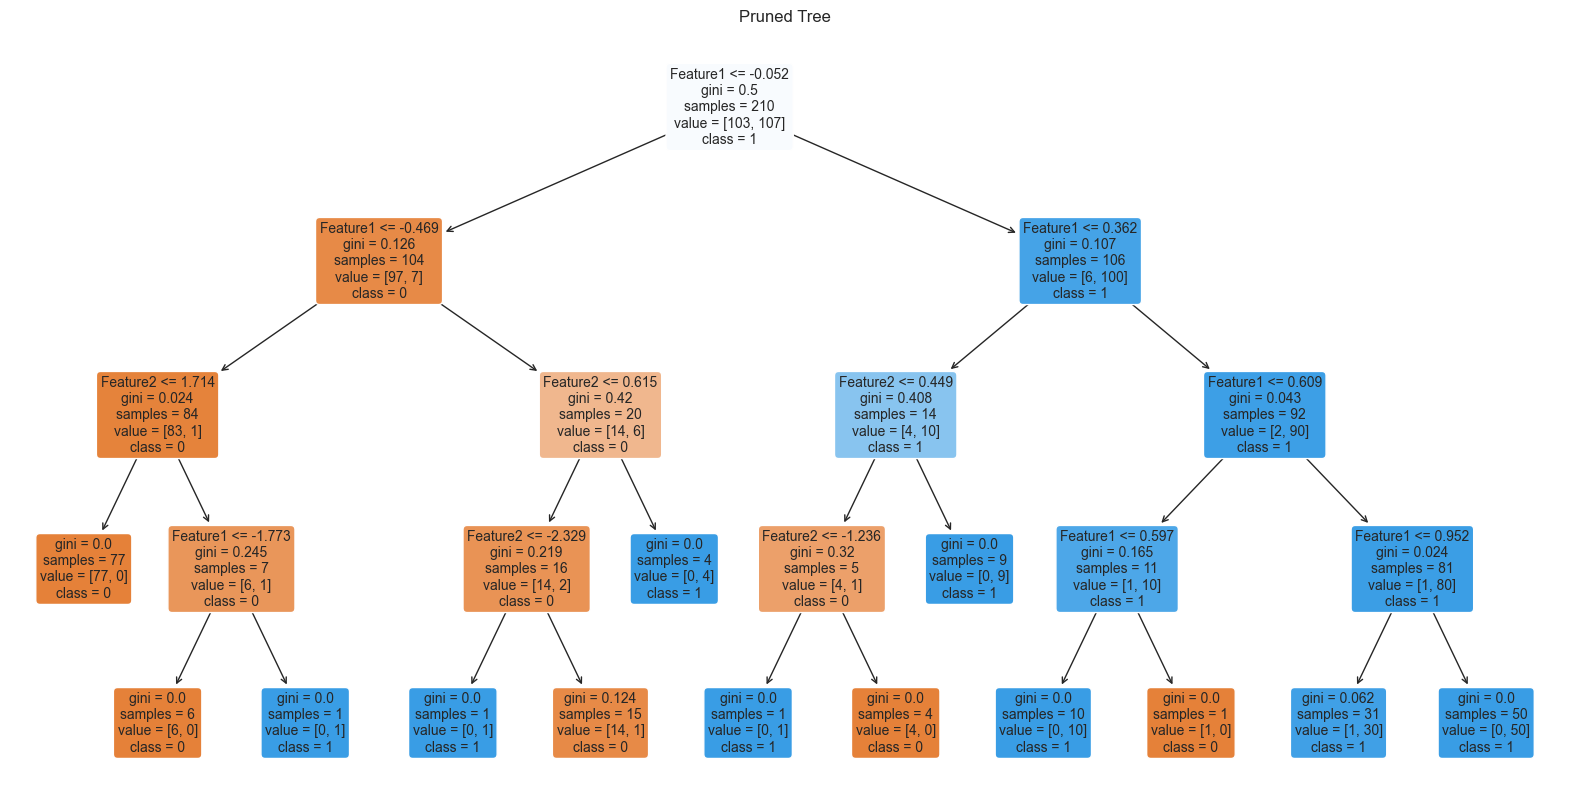

In [58]:

pruned_tree = DecisionTreeClassifier(criterion="gini", max_depth=optimal_depth, random_state=0)
pruned_tree.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(pruned_tree, 
          feature_names=X_train.columns, 
          class_names=["0", "1"],
          filled=True, rounded=True, fontsize=10)
plt.title(f"Pruned Tree")
plt.show()
